<a href="https://colab.research.google.com/github/heyitzrizki/final-project-ds49-group3/blob/main/eda%20%26%20preprocessing/eda_%26_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Connect to GitHub

## 0.1 Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from datetime import datetime
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 0.2 Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/heyitzrizki/final-project-ds49-group3/refs/heads/main/data/dataset.csv'
df = pd.read_csv(url)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [4]:
#Change format object to date_time

df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['market_id'] = df['market_id'].astype('object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  object        
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

# 1. Exploratory Data Analysis

## 1.1 Check Null Values

In [7]:
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [8]:
# Percentage of missing value for each column
missing_percent = df.isnull().sum()/df.shape[0]*100
missing_percent

,0
market_id,0.499929
created_at,0.000000
actual_delivery_time,0.003546
store_id,0.000000
store_primary_category,2.411006
order_protocol,0.503981
total_items,0.000000
subtotal,0.000000
num_distinct_items,0.000000
min_item_price,0.000000


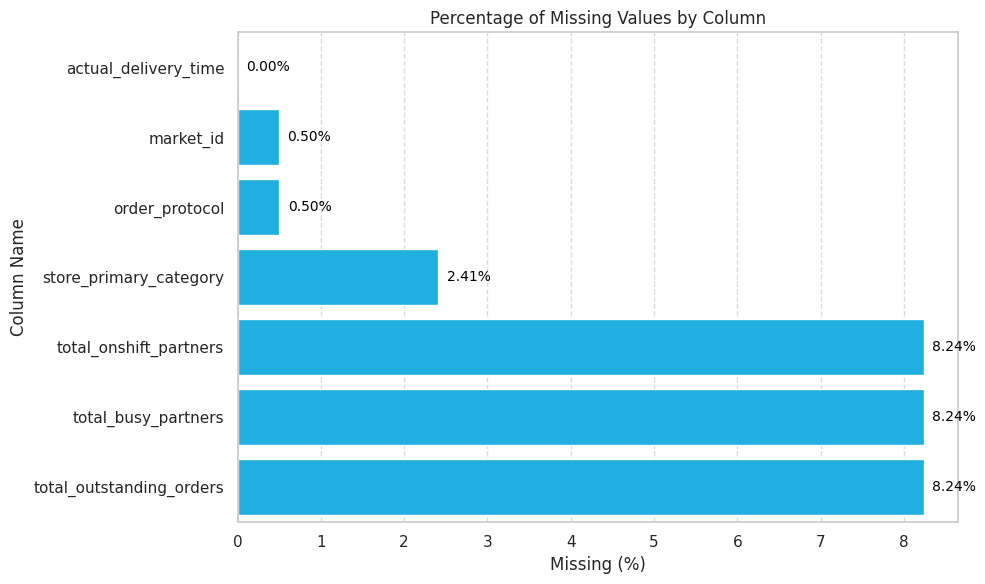

In [14]:
# Create new DataFrame for plot
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=True)
missing_df = pd.DataFrame({'column_name': missing_percent.index, 'missing (%)': missing_percent.values})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='missing (%)', y='column_name', data=missing_df, color='deepskyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Missing (%)')
plt.ylabel('Column Name')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(missing_df['missing (%)']):
    plt.text(
        value + 0.1,
        index,
        f"{value:.2f}%",
        va='center',
        fontsize=10,
        color='black'
    )
plt.tight_layout()
plt.show()

## 1.2 Check Duplicate Data

In [15]:
df_duplicate = df.copy()

In [16]:
df.duplicated().sum()

np.int64(0)

There are no DUPLICATED DATA

## 1.3 Check Unique Values

### 1.3.1 Check Data Shape

In [17]:
df.shape

(197428, 14)

### 1.3.2 Check Data Type

In [18]:
df.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64


### 1.3.3 Check Data Stats

In [19]:
df.describe()

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,197428,197421,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
min,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2015-01-29 02:32:42,2015-01-29 03:22:29,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000
std,NaN,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830


1. min of min_item_price is -86? Impossible.
2. min value of total_onshift_partners, total_busy_partners, and total_outstanding_orders are negative? Does not make sense.

## 1.4 Explore Data

### 1.4.1 Data Cleaning

In [ ]:
# Drop null data

data = df.dropna(inplace = True)

In [ ]:
df.isna().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [ ]:
df.describe()

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,176248,176248,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000
mean,2015-02-04 19:35:43.333773824,2015-02-04 20:23:29.186373632,2.911687,3.204592,2696.498939,2.674589,684.937730,1159.886994,44.905276,41.845434,58.206800
min,2015-01-21 15:22:03,2015-01-21 16:16:34,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2015-01-29 01:37:01.500000,2015-01-29 02:24:29,1.000000,2.000000,1408.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000
50%,2015-02-05 02:30:12.500000,2015-02-05 03:31:58,3.000000,3.000000,2221.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000
75%,2015-02-12 00:52:58.249999872,2015-02-12 01:35:34,4.000000,4.000000,3407.000000,3.000000,942.000000,1395.000000,65.000000,62.000000,85.000000
max,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000
std,NaN,NaN,1.512920,2.673899,1828.922584,1.625558,519.911425,560.784510,34.529394,32.154573,52.708344


In [ ]:
# Creating Column "DELIVERY TIME"

df['delivery_time'] = df['actual_delivery_time'] - df['created_at']
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,0 days 00:26:26
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,0 days 00:37:53
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,0 days 00:49:48


In [ ]:
# Delivery time in minutes

df['delivery_time'] = df['delivery_time'].dt.total_seconds() / 60
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000


In [ ]:
# Because column of ("Created_at" and "actual_delivery_time") was not used (temporary)
# Drop the columns

df.drop(columns=['created_at', 'actual_delivery_time', 'store_id'], inplace=True)
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667
8,2.0,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333
14,1.0,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333
15,1.0,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000


In [ ]:
df.describe()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
count,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000
mean,2.911687,3.204592,2696.498939,2.674589,684.937730,1159.886994,44.905276,41.845434,58.206800,47.764210
std,1.512920,2.673899,1828.922584,1.625558,519.911425,560.784510,34.529394,32.154573,52.708344,27.654861
min,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,1.683333
25%,1.000000,2.000000,1408.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,35.083333
50%,3.000000,3.000000,2221.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,44.366667
75%,4.000000,4.000000,3407.000000,3.000000,942.000000,1395.000000,65.000000,62.000000,85.000000,56.366667
max,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,6231.316667


In [ ]:
# Average delivery time = 46.76 minutes
# Median delivery time = 44.37 minutes

### 1.4.2 Explore Numerical Features

In [ ]:
# Select columns only numerical data

df_duplicate = df.copy()

df_duplicate_num = df_duplicate.select_dtypes(exclude=["object", "datetime"])
df_duplicate_num.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333
1,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667
8,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333
14,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333
15,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000


In [ ]:
# Define a threshold for quasi-constant features (e.g., 98% similar values)
quasi_constant_threshold = 0.02

# Initialize the VarianceThreshold selector
selector = VarianceThreshold(
    threshold=quasi_constant_threshold
)

# Fit the selector to the numerical features (excluding the target variable 'SalePrice')
selector.fit(df_duplicate_num.iloc[:, :-1])

# Get the indices of features that are not quasi-constant
# These are the features we want to keep.
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features:
selected_feature_names = (
    df_duplicate_num
    .columns[selected_feature_indices]
    .tolist()
)

print(f"Selected features:")
pprint.pprint(selected_feature_names)

Selected features:
['order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']


In [ ]:
selected_feature_indices

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# Get the number of features that are not constant
print(f"Number of retained features:")
print(len(selected_feature_indices))
print("\n")
print(f"Number of quasi_constant features:")
print(len(df_duplicate_num.iloc[:, :-1].columns) - len(selected_feature_indices))

Number of retained features:
9


Number of quasi_constant features:
0


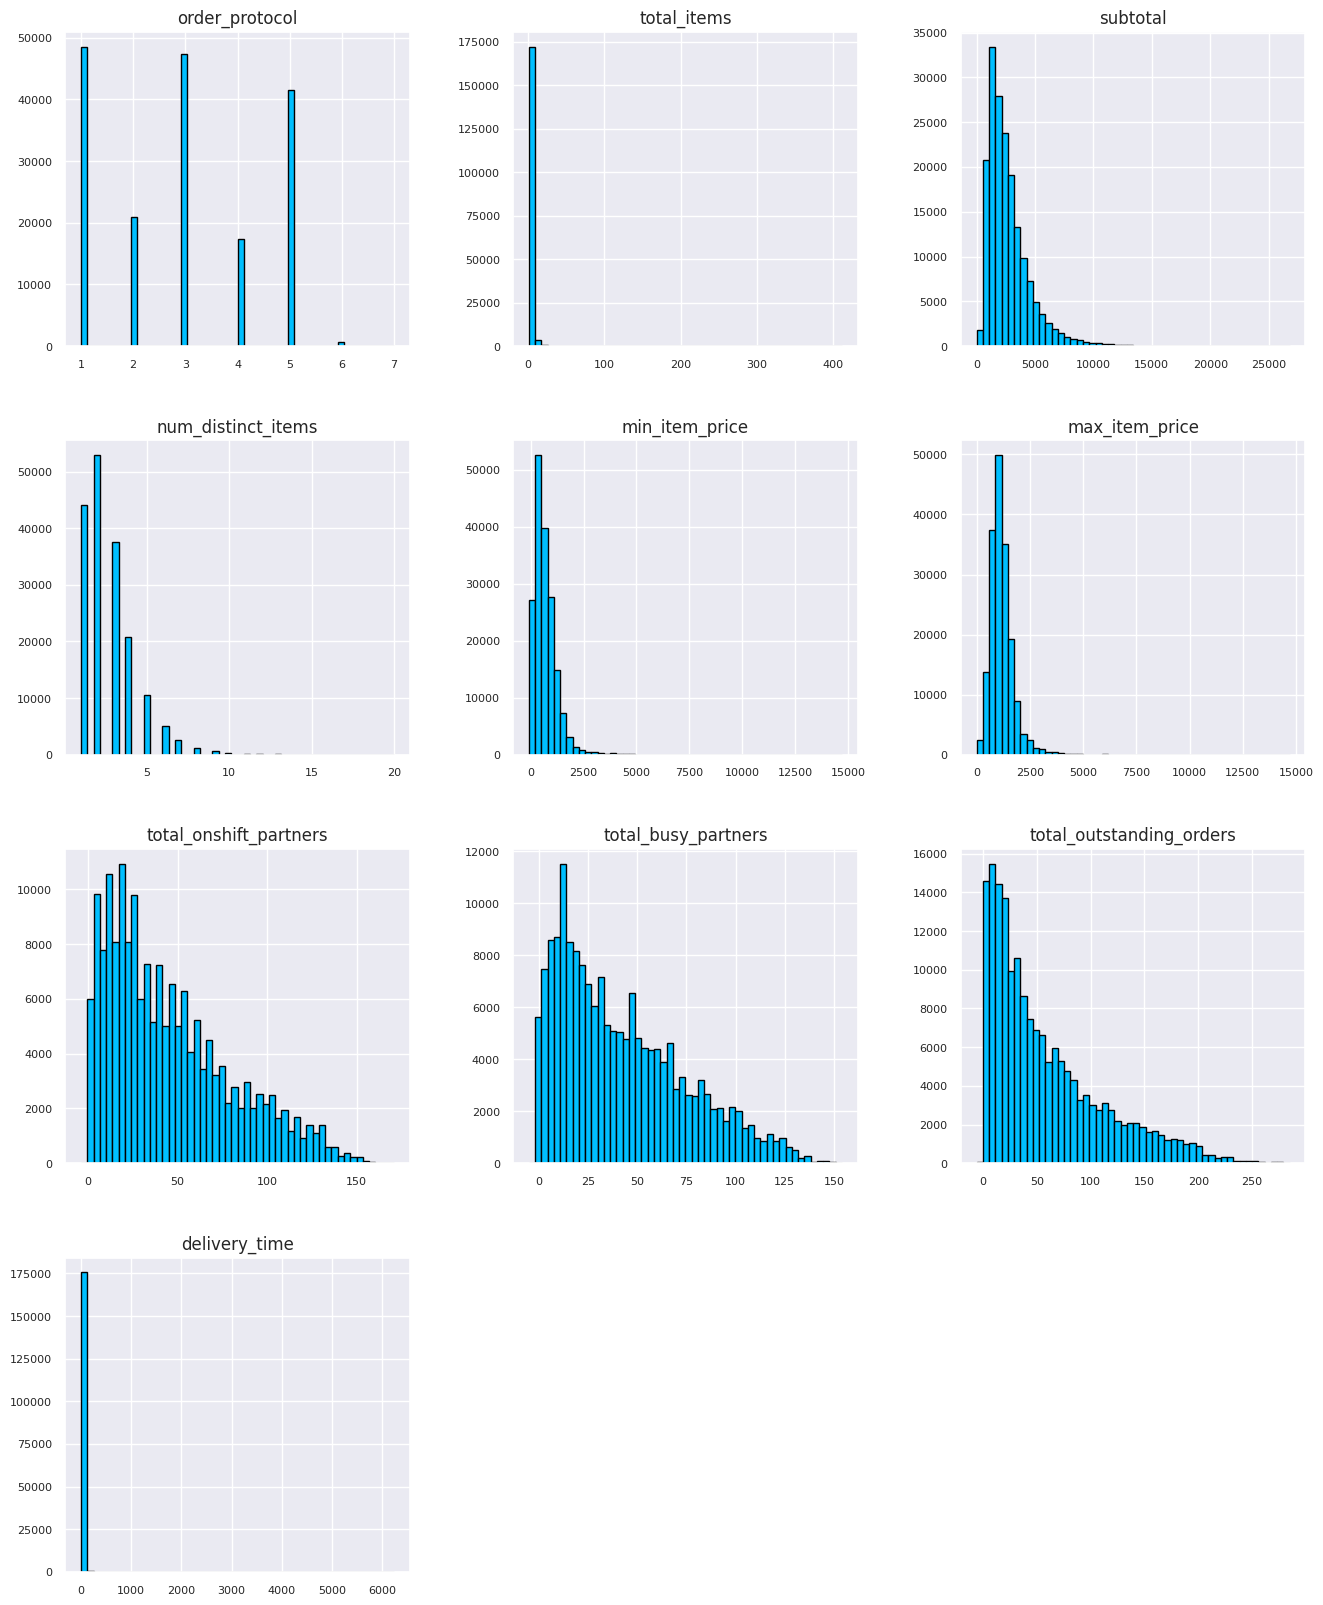

In [ ]:
# Plot the distribution of all the numerical data
fig_ = df_duplicate_num.hist(
    figsize=(16, 20),
    bins=50,
    color="deepskyblue",
    edgecolor="black",
    xlabelsize=8,
    ylabelsize=8
)

#### a. Correlation Heatmap

Heatmap for all the remaining numerical data including the target 'Total Outstanding Orders'

In [ ]:
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
# Define correlation matrix
corr_matrix = df_duplicate_num.corr()
corr_matrix

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
order_protocol,1.00,0.01,-0.05,-0.02,-0.04,-0.09,0.15,0.15,0.14,-0.05
total_items,0.01,1.00,0.56,0.76,-0.39,-0.05,0.03,0.03,0.03,0.08
subtotal,-0.05,0.56,1.00,0.68,0.04,0.51,0.13,0.13,0.13,0.14
num_distinct_items,-0.02,0.76,0.68,1.00,-0.45,0.05,0.07,0.06,0.07,0.11
min_item_price,-0.04,-0.39,0.04,-0.45,1.00,0.54,0.04,0.04,0.04,0.01
max_item_price,-0.09,-0.05,0.51,0.05,0.54,1.00,0.13,0.13,0.13,0.09
total_onshift_partners,0.15,0.03,0.13,0.07,0.04,0.13,1.00,0.94,0.94,0.05
total_busy_partners,0.15,0.03,0.13,0.06,0.04,0.13,0.94,1.00,0.93,0.06
total_outstanding_orders,0.14,0.03,0.13,0.07,0.04,0.13,0.94,0.93,1.00,0.12
delivery_time,-0.05,0.08,0.14,0.11,0.01,0.09,0.05,0.06,0.12,1.00


In [ ]:
# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
corr_matrix

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
order_protocol,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
total_items,0.00,1.00,0.56,0.76,-0.39,0.00,0.00,0.00,0.00,0.00
subtotal,0.00,0.56,1.00,0.68,0.00,0.51,0.00,0.00,0.00,0.00
num_distinct_items,0.00,0.76,0.68,1.00,-0.45,0.00,0.00,0.00,0.00,0.00
min_item_price,0.00,-0.39,0.00,-0.45,1.00,0.54,0.00,0.00,0.00,0.00
max_item_price,0.00,0.00,0.51,0.00,0.54,1.00,0.00,0.00,0.00,0.00
total_onshift_partners,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.94,0.94,0.00
total_busy_partners,0.00,0.00,0.00,0.00,0.00,0.00,0.94,1.00,0.93,0.00
total_outstanding_orders,0.00,0.00,0.00,0.00,0.00,0.00,0.94,0.93,1.00,0.00
delivery_time,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [ ]:
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

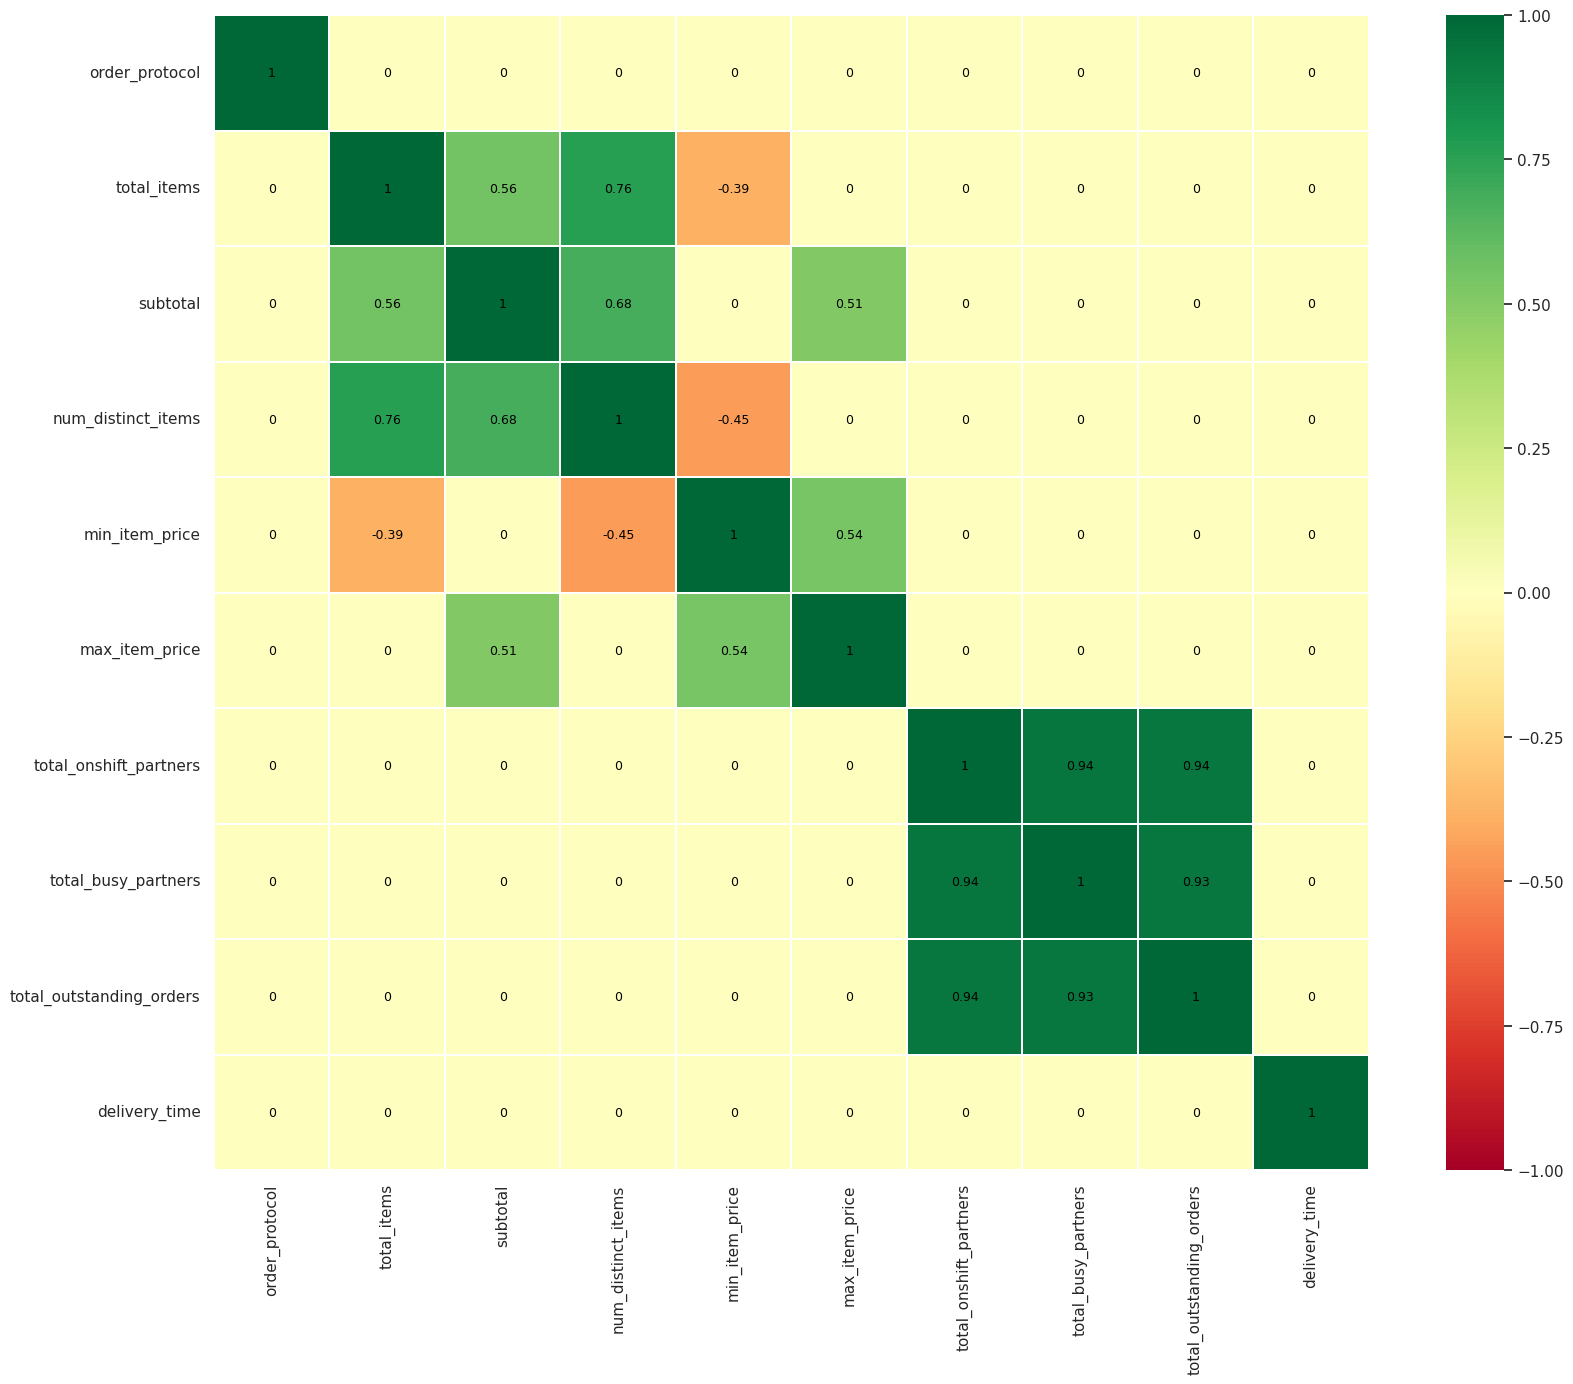

In [ ]:
cmap = "RdYlGn"

# Plot the heatmap
sns.heatmap(
    data=corr_matrix,
    vmax=1.0,
    vmin=-1.0,
    linewidths=0.1,
    annot_kws={
        "size": 9,
        "color": "black"
    },
    square=True,
    cmap=cmap,
    annot=True
);

In [ ]:
corr_values = df_duplicate_num.corr()['delivery_time'].drop('delivery_time')

print(corr_values.sort_values(ascending=False))

subtotal                    0.14
total_outstanding_orders    0.12
num_distinct_items          0.11
max_item_price              0.09
total_items                 0.08
total_busy_partners         0.06
total_onshift_partners      0.05
min_item_price              0.01
order_protocol             -0.05
Name: delivery_time, dtype: float64


In [ ]:
# Calculate correlation with 'delivery_time' for numerical features
corr_delivery_time = df_duplicate_num.corr()["delivery_time"][:-1]

# Identify strongly correlated features (correlation coefficient >= 0.5)
strong_correlations = (
    corr_delivery_time[abs(corr_delivery_time) >= 0.5]
    .sort_values(ascending=False)
)
print(f"{len(strong_correlations)} strongly correlated features with delivery_time:")
print(strong_correlations)

print("\n-------------------------#######-------------------------\n")

# Identify moderately correlated features (0.3 <= correlation coefficient < 0.5)
moderate_correlations = (
    corr_delivery_time[(abs(corr_delivery_time) < 0.5) \
    & (abs(corr_delivery_time) >= 0.3)]
    .sort_values(ascending=False)
)
print(f"{len(moderate_correlations)} moderately correlated features with total_outstanding_orders:")
print(moderate_correlations)

0 strongly correlated features with delivery_time:
Series([], Name: delivery_time, dtype: float64)

-------------------------#######-------------------------

0 moderately correlated features with total_outstanding_orders:
Series([], Name: delivery_time, dtype: float64)


In [ ]:
corr_values.index.tolist()

['order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']

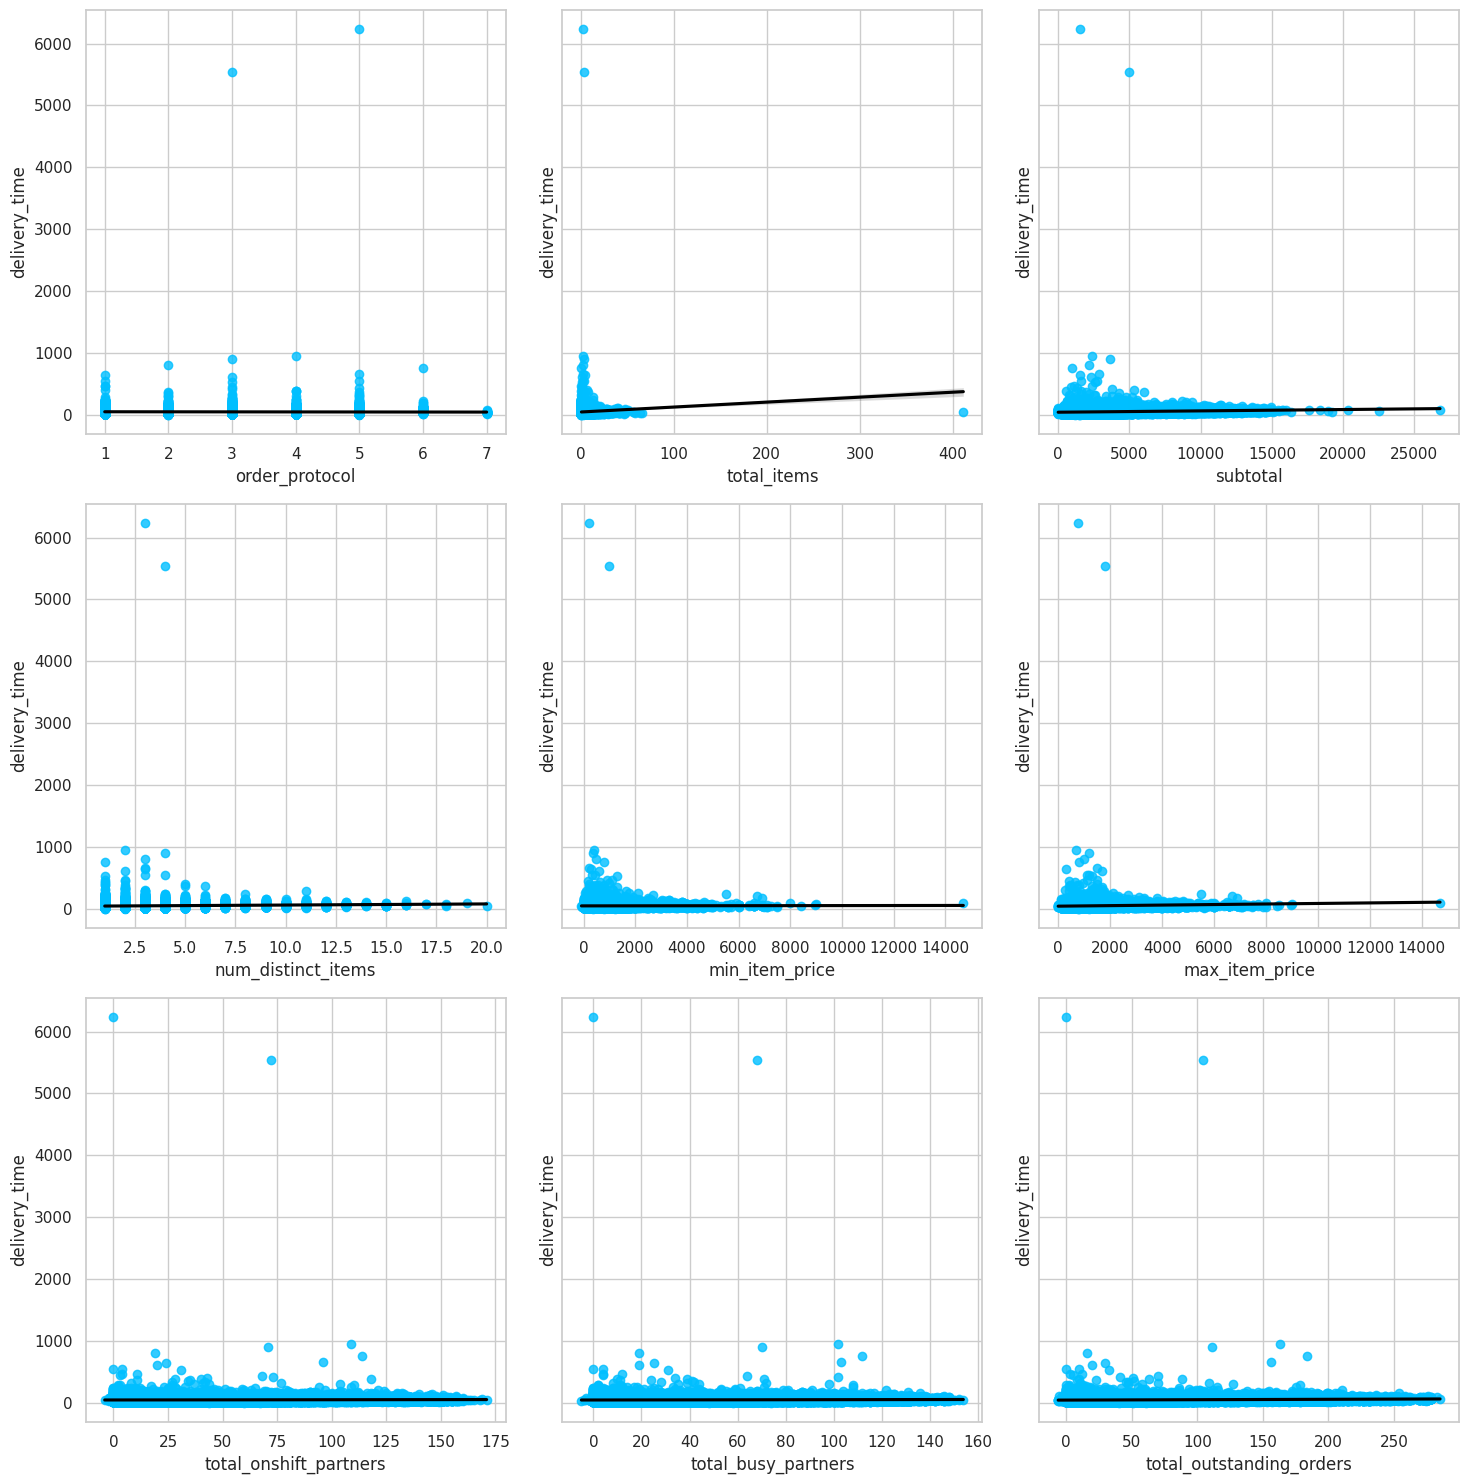

In [ ]:
# Correlation Features
corr_features = corr_values.index.tolist()
corr_features.append("delivery_time")
df_corr_features = df_duplicate_num.loc[:, corr_features]

sns.set_style("whitegrid")  # define figures style

# Calculate the number of rows and columns for subplots
n_rows = (len(corr_features) -1 + 2) // 3  # Ensure enough rows
n_cols = min(3, len(corr_features) - 1)


fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(15, 5 * n_rows),
    sharey=True
)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i in range(len(corr_features) - 1):
    sns.regplot(
        x=corr_features[i],
        y="delivery_time",
        data=df_corr_features,
        ax=axes[i],
        scatter_kws={"color": "deepskyblue"},
        line_kws={"color": "black"},
    )
    axes[i].set_xlabel(corr_features[i]) # Set xlabel for each subplot


# Turn off any unused subplots
for i in range(len(corr_features) - 1, len(axes)):
    axes[i].set_axis_off()

plt.tight_layout()
plt.show()

#### b. Missing Data of Numerical Features

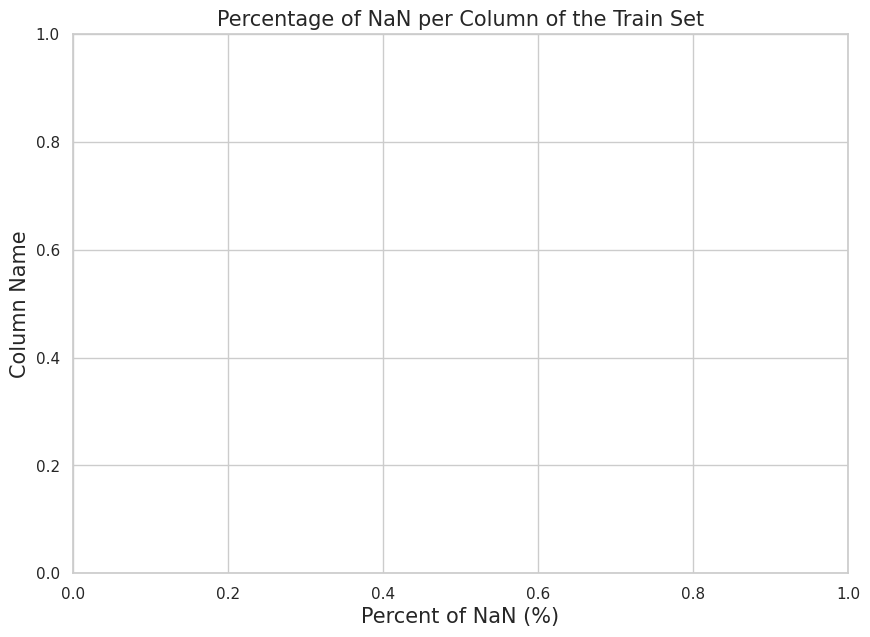

In [ ]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_duplicate_num.columns[df_duplicate_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    nan_percentage = round(df_duplicate_num[i].isnull().sum()*100/len(df_duplicate_num), 2)
    percent_nan.append(nan_percentage)

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(
    by=["Percent_NaN"],
    ascending=False,
    inplace=True
)

# Define figure parameters
sns.set(rc={"figure.figsize":(10, 7)})
sns.set_style("whitegrid")
fontsize=15

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)

p.set_title("Percentage of NaN per Column of the Train Set", fontsize=fontsize)
p.set_xlabel("Percent of NaN (%)", fontsize=fontsize)
p.set_ylabel("Column Name", fontsize=fontsize);

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")

df_duplicate_imputed = pd.DataFrame(
    my_imputer.fit_transform(df_duplicate_num)
)

df_duplicate_imputed.head()

,0,1,2,3,4,5,6,7,8,9
0,1.00,4.00,"3,441.00",4.00,557.00,"1,239.00",33.00,14.00,21.00,62.98
1,2.00,1.00,"1,900.00",1.00,"1,400.00","1,400.00",1.00,2.00,2.00,67.07
2,3.00,4.00,"4,771.00",3.00,820.00,"1,604.00",8.00,6.00,18.00,26.43
3,1.00,1.00,"1,525.00",1.00,"1,525.00","1,525.00",5.00,6.00,8.00,37.88
4,1.00,2.00,"3,620.00",2.00,"1,425.00","2,195.00",5.00,5.00,7.00,49.80


In [ ]:
df_duplicate_imputed.columns = df_duplicate_num.columns
df_duplicate_imputed.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.00,4.00,"3,441.00",4.00,557.00,"1,239.00",33.00,14.00,21.00,62.98
1,2.00,1.00,"1,900.00",1.00,"1,400.00","1,400.00",1.00,2.00,2.00,67.07
2,3.00,4.00,"4,771.00",3.00,820.00,"1,604.00",8.00,6.00,18.00,26.43
3,1.00,1.00,"1,525.00",1.00,"1,525.00","1,525.00",5.00,6.00,8.00,37.88
4,1.00,2.00,"3,620.00",2.00,"1,425.00","2,195.00",5.00,5.00,7.00,49.80


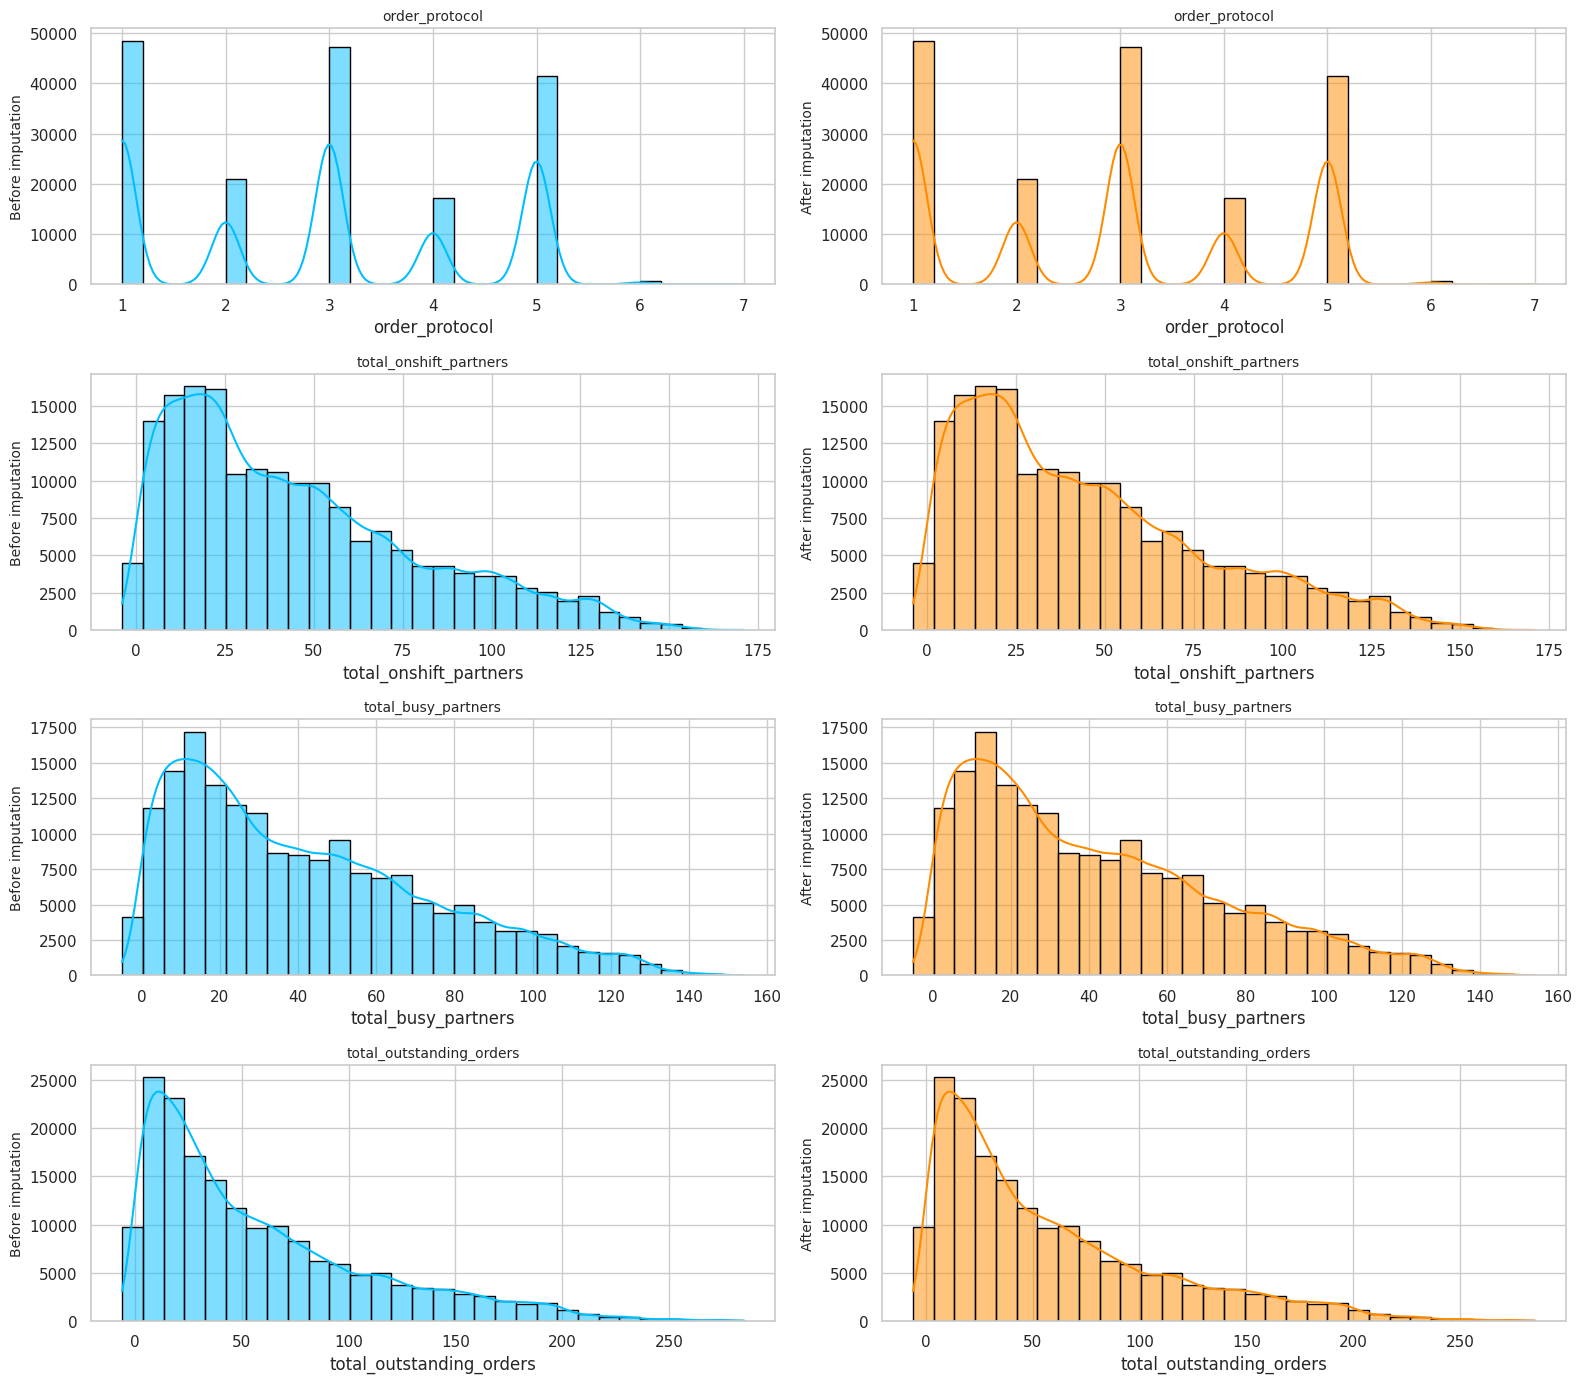

In [ ]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (16, 14 )})
sns.set_style("whitegrid")
fig, axes = plt.subplots(4, 2)
fontsize=10

# Features to plot
features = ["order_protocol", "total_onshift_partners", "total_busy_partners", "total_outstanding_orders"]

# Plot the results
for i, feature in enumerate(features):
    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(
        ax=axes[i, 0],
        x=df_duplicate_num[feature],
        kde=True,
        bins=30,
        color="deepskyblue",
        edgecolor="black"
    )
    p.set_ylabel(f"Before imputation", fontsize=fontsize)
    p.set_title(f"{feature}", fontsize=fontsize)

    # after imputation
    q = sns.histplot(
        ax=axes[i, 1],
        x=df_duplicate_imputed[feature],
        kde=True,
        bins=30,
        color="darkorange",
        edgecolor="black"
    )
    q.set_ylabel(f"After imputation", fontsize=fontsize)
    q.set_title(f"{feature}", fontsize=fontsize)

plt.tight_layout()
plt.show()

In [ ]:
df_duplicate_imputed.drop(
    columns=["total_outstanding_orders", "total_busy_partners", "total_onshift_partners"],
    inplace=True
)

df_duplicate_imputed.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,delivery_time
0,1.00,4.00,"3,441.00",4.00,557.00,"1,239.00",62.98
1,2.00,1.00,"1,900.00",1.00,"1,400.00","1,400.00",67.07
2,3.00,4.00,"4,771.00",3.00,820.00,"1,604.00",26.43
3,1.00,1.00,"1,525.00",1.00,"1,525.00","1,525.00",37.88
4,1.00,2.00,"3,620.00",2.00,"1,425.00","2,195.00",49.80


###1.4.3 Explore & Clean Categorical Features

In [ ]:
df_duplicate_categ = df_duplicate.select_dtypes("object")
df_duplicate_categ.head()

,market_id,store_primary_category
0,1.00,american
1,2.00,mexican
8,2.00,indian
14,1.00,italian
15,1.00,italian


In [ ]:
# Categorical to Quantitative relationship

categ_features = df_duplicate.select_dtypes(include='object').columns.tolist()
categ_features.append("delivery_time")

df_categ = df_duplicate[categ_features]

In [ ]:
df_categ.head()

,market_id,store_primary_category,delivery_time
0,1.00,american,62.98
1,2.00,mexican,67.07
8,2.00,indian,26.43
14,1.00,italian,37.88
15,1.00,italian,49.80


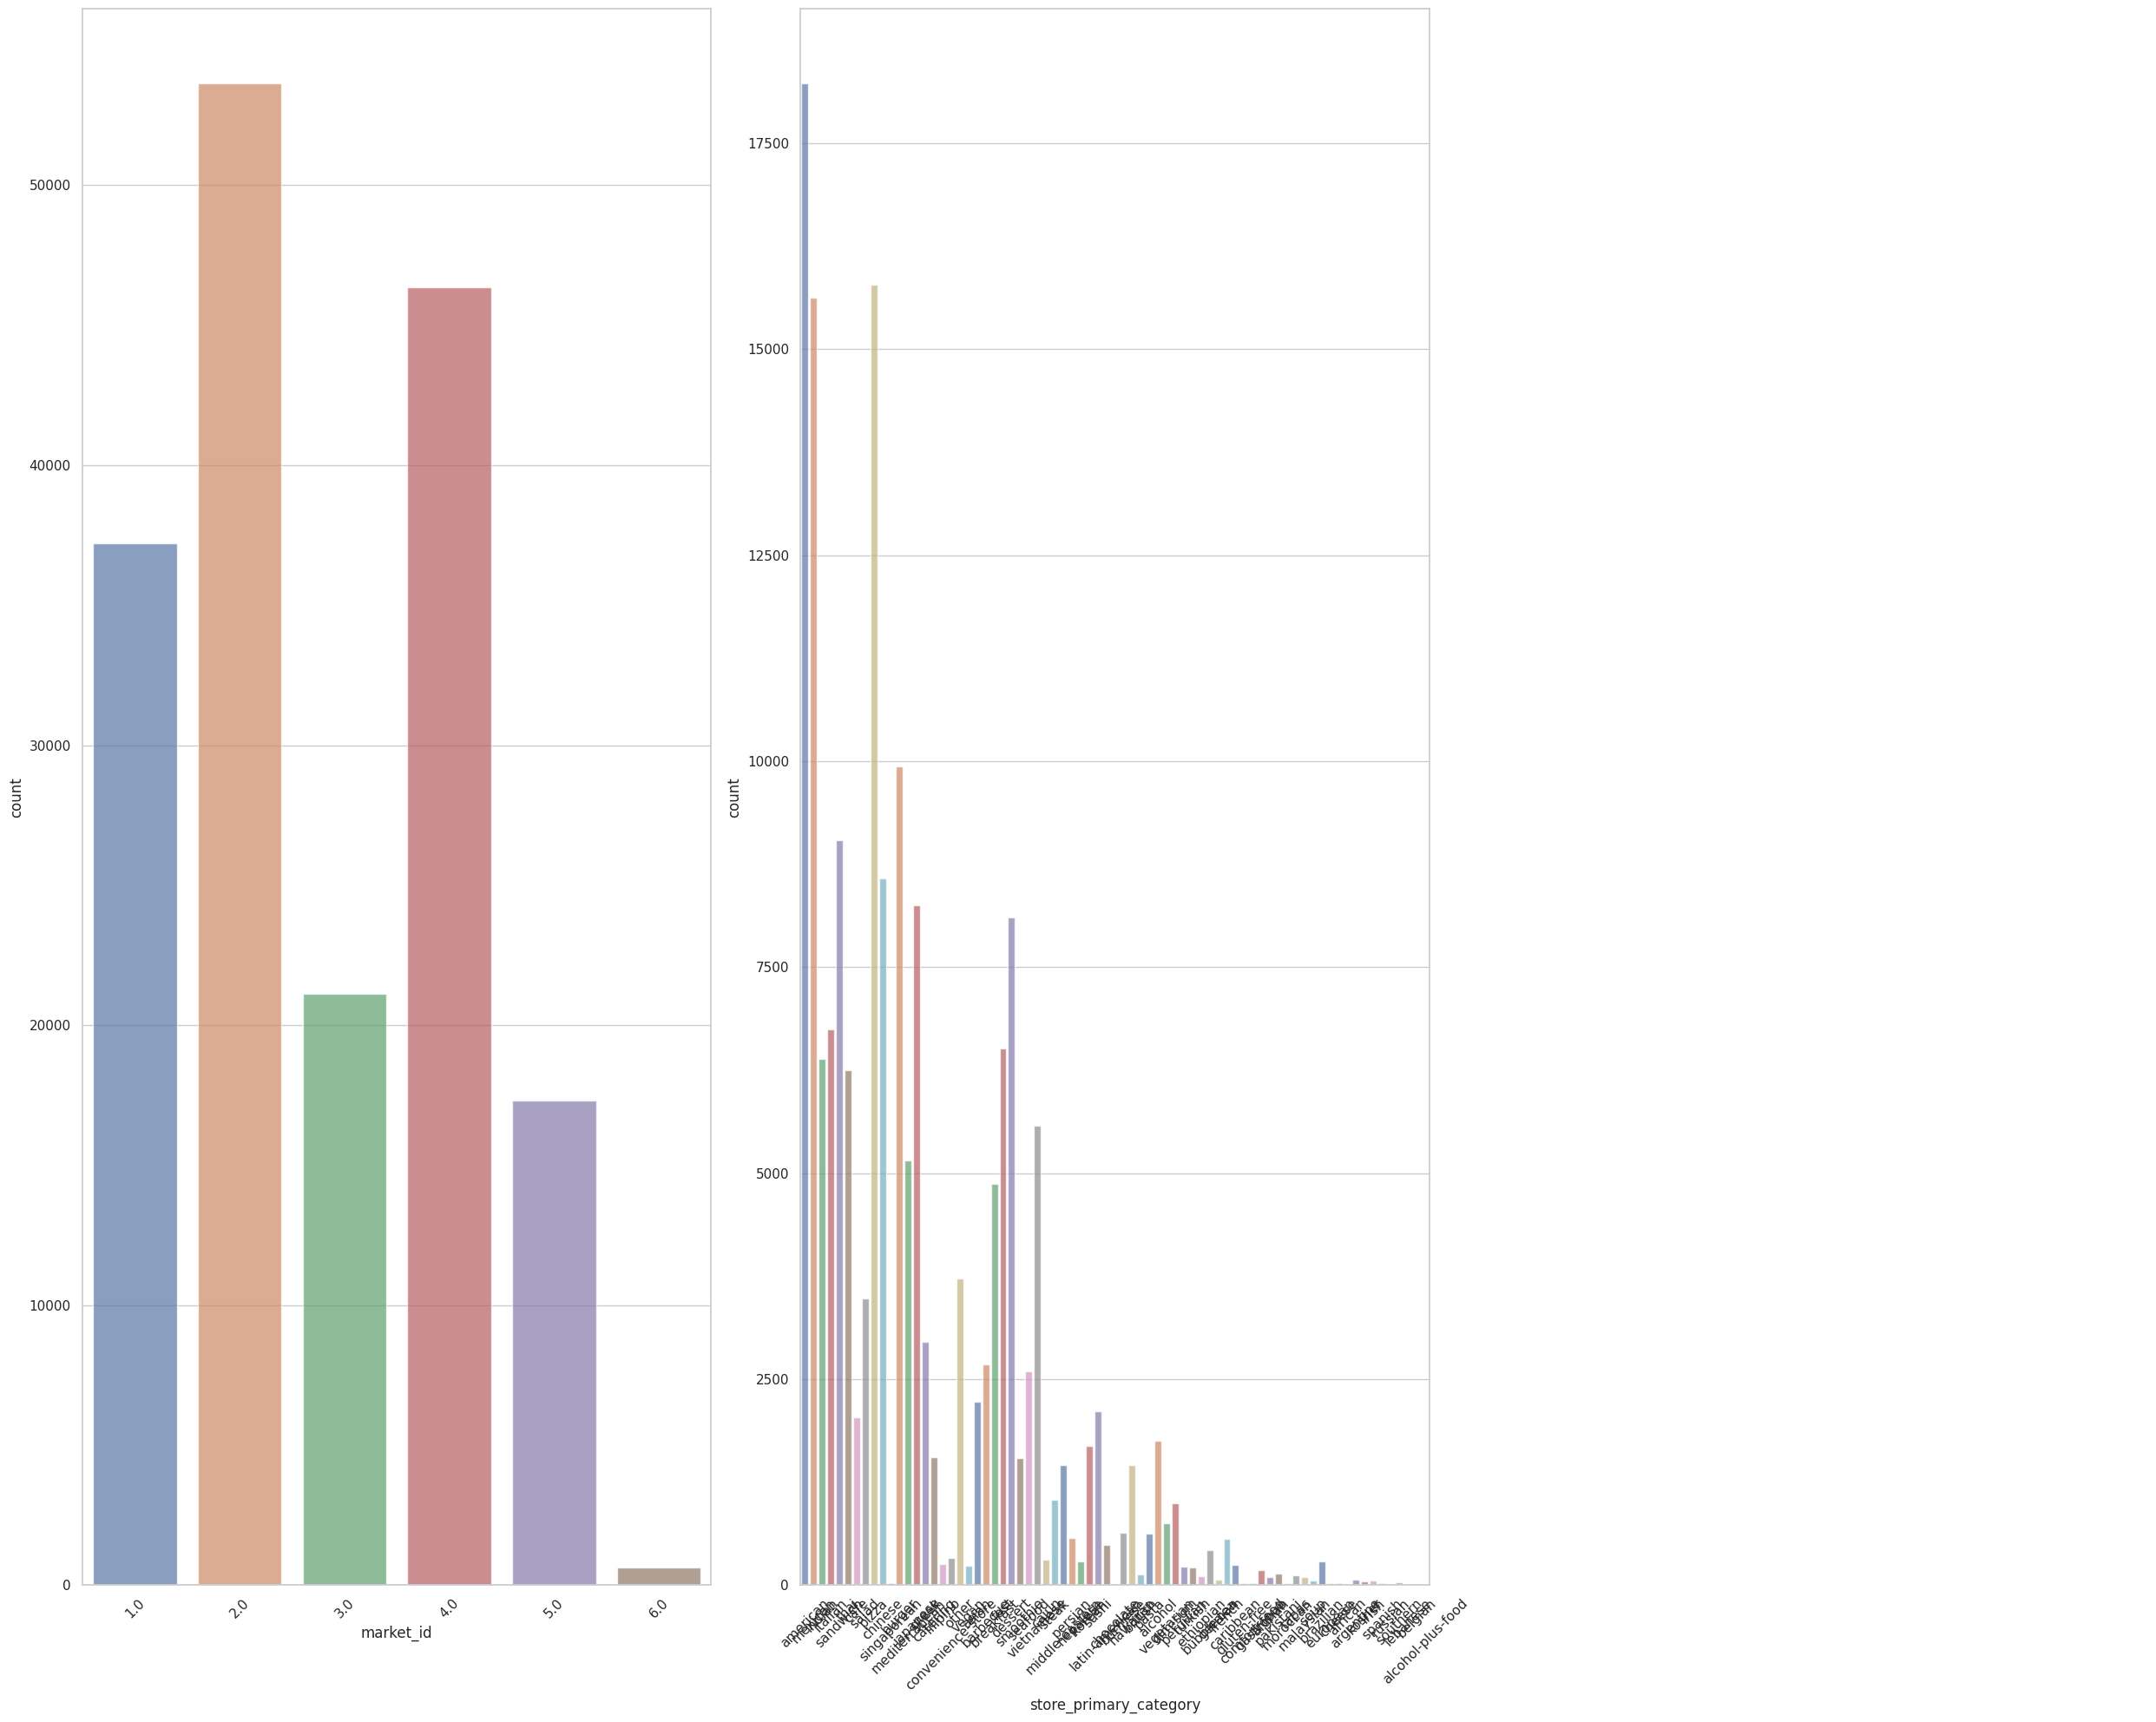

In [ ]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    nrows=round(len(df_categ.columns) / 3),
    ncols=3,
    figsize=(25, 20)
)

for i, ax in enumerate(axes.flatten()):  # Iterate through flattened axes array
    if i < (len(df_categ.columns)-1): # -1 because we exclude delivery_time

        sns.countplot(
            x=df_categ.columns[i],
            alpha=0.7,
            data=df_categ,
            palette="deep",
            ax=ax
        )

        ax.tick_params(
            axis='x',
            rotation=45
        )
    else:
        ax.set_axis_off() # Hide empty subplots

fig.tight_layout()
plt.show()
title = "Countplot for each of the categorical features in the train set"

#### a. Missing Data of Categorical Features

In [ ]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {
    "store_primary_category": df_categ["store_primary_category"].mode().iloc[0],
    "market_id" : df_categ["market_id"].mode().iloc[0],
}

df_categ = df_categ.fillna(value=categ_fill_null)

In [ ]:
df_categ.head()

,market_id,store_primary_category,delivery_time
0,1.00,american,62.98
1,2.00,mexican,67.07
8,2.00,indian,26.43
14,1.00,italian,37.88
15,1.00,italian,49.80


In [ ]:
df_duplicate_categ = df_categ.drop(columns=["delivery_time"])

## 1.6 Merge Numerical and Categorical into One Data Set

In [ ]:
# Add binary features to numerical features

df_new = df_duplicate_num.join(df_duplicate_categ)
print(f"df_new: {df_new.shape}")

df_new: (176248, 12)


In [ ]:
df_new.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,market_id,store_primary_category
0,1.00,4,3441,4,557,1239,33.00,14.00,21.00,62.98,1.00,american
1,2.00,1,1900,1,1400,1400,1.00,2.00,2.00,67.07,2.00,mexican
8,3.00,4,4771,3,820,1604,8.00,6.00,18.00,26.43,2.00,indian
14,1.00,1,1525,1,1525,1525,5.00,6.00,8.00,37.88,1.00,italian
15,1.00,2,3620,2,1425,2195,5.00,5.00,7.00,49.80,1.00,italian


In [ ]:
df_new.isna().sum()

,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0
total_onshift_partners,0
total_busy_partners,0
total_outstanding_orders,0
delivery_time,0


# 2. Data Preprocessing

In [ ]:
df_new.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,market_id,store_primary_category
0,1.00,4,3441,4,557,1239,33.00,14.00,21.00,62.98,1.00,american
1,2.00,1,1900,1,1400,1400,1.00,2.00,2.00,67.07,2.00,mexican
8,3.00,4,4771,3,820,1604,8.00,6.00,18.00,26.43,2.00,indian
14,1.00,1,1525,1,1525,1525,5.00,6.00,8.00,37.88,1.00,italian
15,1.00,2,3620,2,1425,2195,5.00,5.00,7.00,49.80,1.00,italian


## 2.1 Encoding

In [ ]:
pip install sparse

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
import sparse
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X = df.drop(['delivery_time'], axis=1) # Features
y = df['delivery_time'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#encode categorical columns

cat_cols = ['store_primary_category']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Train Data
X_train_encoded = pd.DataFrame(
    encoder.fit_transform(X_train[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_train.index
)

# Test Data
X_test_encoded = pd.DataFrame(
    encoder.transform(X_test[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_test.index
)

#Drop Original Categorical Columns
X_train_num = X_train.drop(cat_cols, axis=1)
X_test_num = X_test.drop(cat_cols, axis=1)

#Concatenate Numeric and Encoded Categorical Features
X_train_processed = pd.concat([X_train_num, X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_encoded], axis=1)

## 2.2 Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train model
model = RandomForestRegressor(random_state=42, n_jobs=-1)

#Train
model.fit(X_train_processed, y_train)

# Predict
y_pred = model.predict(X_test_processed)

In [ ]:
# Evaluate Model

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 342.75
MAE: 11.90
R² Score: 0.09


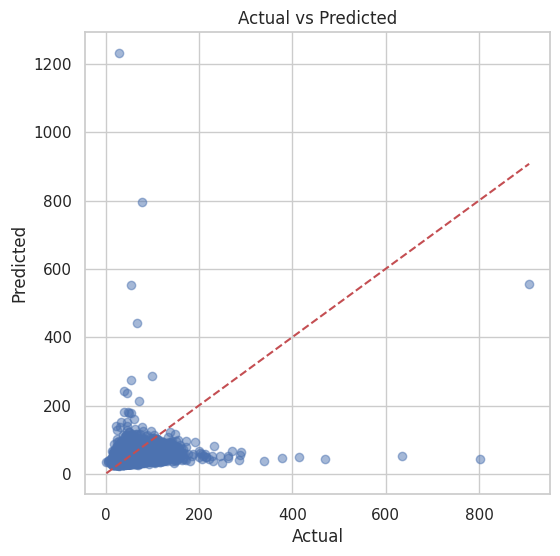

In [ ]:
# Plot Predict vs Actual

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

## 2.3 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test_processed)

In [ ]:
# Evaluate Model

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Linear Regression Performance:
RMSE: 17.88
R² Score: 0.16


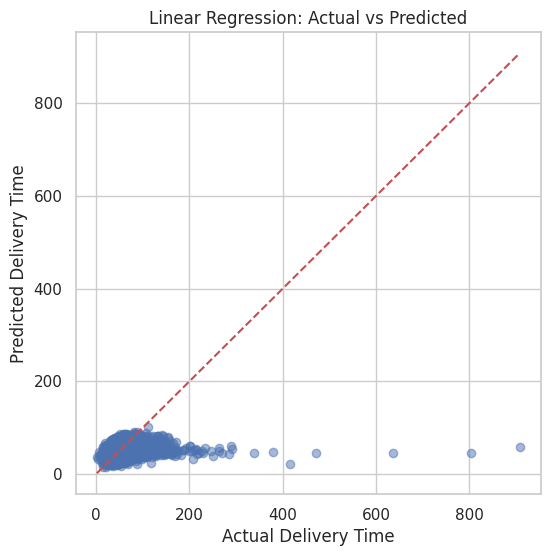

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

## 2.4 Compare Linear Regression & Random Forest

In [ ]:
def evaluate(y_true, y_pred, model_name):
    rmse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} → RMSE: {rmse:.2f}, R²: {r2:.2f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred, "Random Forest")

Linear Regression → RMSE: 319.71, R²: 0.16
Random Forest → RMSE: 342.75, R²: 0.09


## 2.5 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

In [ ]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_processed.columns)
X_test_scaled_df.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,store_primary_category_breakfast,store_primary_category_british,store_primary_category_bubble-tea,store_primary_category_burger,store_primary_category_burmese,store_primary_category_cafe,store_primary_category_cajun,store_primary_category_caribbean,store_primary_category_catering,store_primary_category_cheese,store_primary_category_chinese,store_primary_category_chocolate,store_primary_category_comfort-food,store_primary_category_convenience-store,store_primary_category_dessert,store_primary_category_dim-sum,store_primary_category_ethiopian,store_primary_category_european,store_primary_category_fast,store_primary_category_filipino,store_primary_category_french,store_primary_category_gastropub,store_primary_category_german,store_primary_category_gluten-free,store_primary_category_greek,store_primary_category_hawaiian,store_primary_category_indian,store_primary_category_irish,store_primary_category_italian,store_primary_category_japanese,store_primary_category_korean,store_primary_category_kosher,store_primary_category_latin-american,store_primary_category_lebanese,store_primary_category_malaysian,store_primary_category_mediterranean,store_primary_category_mexican,store_primary_category_middle-eastern,store_primary_category_moroccan,store_primary_category_nepalese,store_primary_category_other,store_primary_category_pakistani,store_primary_category_pasta,store_primary_category_persian,store_primary_category_peruvian,store_primary_category_pizza,store_primary_category_russian,store_primary_category_salad,store_primary_category_sandwich,store_primary_category_seafood,store_primary_category_singaporean,store_primary_category_smoothie,store_primary_category_soup,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,-0.56,0.06,1.02,1.15,1.43,-0.26,0.16,-0.11,-0.12,0.15,-0.02,-0.01,-0.10,-0.00,-0.34,-0.02,-0.11,-0.12,-0.00,-0.04,-0.17,-0.03,-0.05,-0.24,-0.06,-0.11,-0.04,-0.04,-0.09,-0.01,-0.23,-0.00,-0.01,-0.04,-0.22,-0.07,-0.03,-0.01,-0.19,-0.04,-0.06,-0.03,-0.02,-0.01,-0.13,-0.09,-0.20,-0.02,-0.20,-0.22,-0.10,-0.02,-0.05,-0.01,-0.02,-0.17,-0.31,-0.09,-0.01,-0.04,-0.15,-0.03,-0.06,-0.06,-0.04,-0.32,-0.01,-0.14,-0.23,-0.12,-0.01,-0.09,-0.02,-0.02,-0.01,-0.08,9.16,-0.02,-0.19,-0.04,-0.04,-0.07,-0.18
1,0.19,-1.26,0.66,1.55,1.43,-0.26,0.60,-0.37,-0.46,-0.53,-0.02,-0.01,-0.10,-0.00,-0.34,-0.02,-0.11,-0.12,-0.00,-0.04,-0.17,-0.03,-0.05,-0.24,-0.06,-0.11,-0.04,-0.04,10.63,-0.01,-0.23,-0.00,-0.01,-0.04,-0.22,-0.07,-0.03,-0.01,-0.19,-0.04,-0.06,-0.03,-0.02,-0.01,-0.13,-0.09,-0.20,-0.02,-0.20,-0.22,-0.10,-0.02,-0.05,-0.01,-0.02,-0.17,-0.31,-0.09,-0.01,-0.04,-0.15,-0.03,-0.06,-0.06,-0.04,-0.32,-0.01,-0.14,-0.23,-0.12,-0.01,-0.09,-0.02,-0.02,-0.01,-0.08,-0.11,-0.02,-0.19,-0.04,-0.04,-0.07,-0.18
2,-1.31,-1.26,1.38,0.99,1.43,-0.75,0.42,-0.66,-0.61,-0.78,-0.02,-0.01,-0.10,-0.00,-0.34,-0.02,-0.11,-0.12,-0.00,-0.04,-0.17,-0.03,-0.05,-0.24,-0.06,-0.11,-0.04,-0.04,-0.09,-0.01,-0.23,-0.00,-0.01,-0.04,-0.22,-0.07,-0.03,-0.01,-0.19,-0.04,-0.06,-0.03,-0.02,-0.01,-0.13,-0.09,5.12,-0.02,-0.20,-0.22,-0.10,-0.02,-0.05,-0.01,-0.02,-0.17,-0.31,-0.09,-0.01,-0.04,-0.15,-0.03,-0.06,-0.06,-0.04,-0.32,-0.01,-0.14,-0.23,-0.12,-0.01,-0.09,-0.02,-0.02,-0.01,-0.08,-0.11,-0.02,-0.19,-0.04,-0.04,-0.07,-0.18
3,-1.31,-1.26,-0.07,-0.62,0.20,-0.92,-0.

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_processed.columns)
X_train_scaled_df.head()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,store_primary_category_breakfast,store_primary_category_british,store_primary_category_bubble-tea,store_primary_category_burger,store_primary_category_burmese,store_primary_category_cafe,store_primary_category_cajun,store_primary_category_caribbean,store_primary_category_catering,store_primary_category_cheese,store_primary_category_chinese,store_primary_category_chocolate,store_primary_category_comfort-food,store_primary_category_convenience-store,store_primary_category_dessert,store_primary_category_dim-sum,store_primary_category_ethiopian,store_primary_category_european,store_primary_category_fast,store_primary_category_filipino,store_primary_category_french,store_primary_category_gastropub,store_primary_category_german,store_primary_category_gluten-free,store_primary_category_greek,store_primary_category_hawaiian,store_primary_category_indian,store_primary_category_irish,store_primary_category_italian,store_primary_category_japanese,store_primary_category_korean,store_primary_category_kosher,store_primary_category_latin-american,store_primary_category_lebanese,store_primary_category_malaysian,store_primary_category_mediterranean,store_primary_category_mexican,store_primary_category_middle-eastern,store_primary_category_moroccan,store_primary_category_nepalese,store_primary_category_other,store_primary_category_pakistani,store_primary_category_pasta,store_primary_category_persian,store_primary_category_peruvian,store_primary_category_pizza,store_primary_category_russian,store_primary_category_salad,store_primary_category_sandwich,store_primary_category_seafood,store_primary_category_singaporean,store_primary_category_smoothie,store_primary_category_soup,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,1.69,-0.60,-0.44,-0.43,-1.03,0.30,-0.56,-1.15,-1.08,-1.03,-0.02,-0.01,-0.10,-0.00,-0.34,-0.02,-0.11,-0.12,-0.00,-0.04,-0.17,-0.03,-0.05,-0.24,-0.06,-0.11,-0.04,-0.04,-0.09,-0.01,-0.23,-0.00,-0.01,-0.04,-0.22,-0.07,-0.03,-0.01,-0.19,-0.04,-0.06,-0.03,-0.02,-0.01,-0.13,-0.09,-0.20,-0.02,-0.20,-0.22,-0.10,-0.02,-0.05,-0.01,-0.02,5.76,-0.31,-0.09,-0.01,-0.04,-0.15,-0.03,-0.06,-0.06,-0.04,-0.32,-0.01,-0.14,-0.23,-0.12,-0.01,-0.09,-0.02,-0.02,-0.01,-0.08,-0.11,-0.02,-0.19,-0.04,-0.04,-0.07,-0.18
1,-1.31,1.38,-0.44,-0.05,-0.41,1.08,0.34,-0.26,-0.18,-0.30,-0.02,-0.01,-0.10,-0.00,-0.34,-0.02,-0.11,-0.12,-0.00,-0.04,-0.17,-0.03,-0.05,-0.24,-0.06,-0.11,-0.04,-0.04,-0.09,-0.01,-0.23,-0.00,-0.01,-0.04,-0.22,-0.07,-0.03,-0.01,-0.19,-0.04,-0.06,-0.03,-0.02,-0.01,-0.13,-0.09,-0.20,-0.02,-0.20,-0.22,-0.10,-0.02,-0.05,-0.01,-0.02,5.76,-0.31,-0.09,-0.01,-0.04,-0.15,-0.03,-0.06,-0.06,-0.04,-0.32,-0.01,-0.14,-0.23,-0.12,-0.01,-0.09,-0.02,-0.02,-0.01,-0.08,-0.11,-0.02,-0.19,-0.04,-0.04,-0.07,-0.18
2,-0.56,1.38,-0.80,-0.87,-1.03,0.79,-0.11,1.19,1.06,0.51,-0.02,-0.01,-0.10,-0.00,-0.34,-0.02,-0.11,-0.12,-0.00,-0.04,-0.17,-0.03,-0.05,-0.24,-0.06,-0.11,-0.04,-0.04,-0.09,-0.01,-0.23,-0.00,-0.01,-0.04,-0.22,-0.07,-0.03,-0.01,-0.19,-0.04,-0.06,-0.03,-0.02,-0.01,-0.13,-0.09,-0.20,-0.02,-0.20,-0.22,-0.10,-0.02,-0.05,-0.01,-0.02,-0.17,-0.31,-0.09,-0.01,-0.04,-0.15,-0.03,-0.06,-0.06,-0.04,3.17,-0.01,-0.14,-0.23,-0.12,-0.01,-0.09,-0.02,-0.02,-0.01,-0.08,-0.11,-0.02,-0.19,-0.04,-0.04,-0.07,-0.18
3,-0.56,1.38,1.38,1.92,2.05,-1.32,0.